In [2]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib

# Introduction to Pandas

Pandas works hand-in-hand with other python libraries (e.g. matplotlib and numpy) to make manipulating data (what the Pandas team calls "Data Munging") easy.  With pandas it is easy to  

1. Easily access data using variable names, but have full linear algebra capabilities of numpy
2. Group data by values (for example, calculate the mean income by state)
3. Plot and summarize values
4. Join (combine) different sources of data
5. Powerful time series and panel data capabilities (beyond scope of course)

Note: If you want to reinforce some of these concepts on your own, I recommend this superb youtube video (https://www.youtube.com/watch?v=5JnMutdy6Fw) and accompanying coursework (https://github.com/brandon-rhodes/pycon-pandas-tutorial) by Brandon Rhodes.

There are numerous ways to get data into Pandas:

* Import excel and comma delimited data
* Import stata, sas, matlab, and other datasets
* Import data from an SQL server
* Import data scraped from the web
* Manually building (by typing in values)

In this tutorial we will focus on the first two methods for reading data, but just know that there is probably a way to get your data into pandas irrespective of what format it is in.

## Loading and Cleaning Data

We will be loading 2010 "Trip" data from the NOAA Fisheries Service Recreational Fisheries Statistics Survey (called MRIP).  More detail here: https://www.fisheries.noaa.gov/topic/recreational-fishing-data  

We will also load the Census Bureau's county and state fips file, obtained here: https://www.census.gov/2010census/xls/fips_codes_website.xls

The MRIPs data needs to be downloaded from my website (you only need to do this once).

In [3]:
# run this once and then comment out with #
# urllib.urlretrieve ("https://rlhick.people.wm.edu/pubp622/data/mrips_2010.pydata", "mrips_2010.pydata")

('mrips_2010.pydata', <httplib.HTTPMessage instance at 0x7f1dda4a1128>)

In [5]:
trips_2010 = pd.io.pickle.read_pickle('mrips_2010.pydata')
fips = pd.io.excel.read_excel('https://rlhick.people.wm.edu/pubp622/data/fips_codes_website.xls')

In [10]:
trips_2010.head()

index  add_hrs add_ph  age area area_nc area_x  art_reef       asg_code  \
0      0      NaN      1  NaN    C              5       NaN  1171020101114   
1      1      NaN      2  NaN    C              5       NaN  1171020101114   
2      2        0      1  NaN    C              5       NaN  1171020101116   
3      3      NaN      1  NaN    C              5       NaN  1171020101123   
4      4      NaN      1  NaN    C              5       NaN  1171020101123   

   boat_hrs      ...        time  tourn    tsn1    tsn2  turtle wave  \
0         0      ...        1330    NaN  167680             NaN    6   
1         0      ...        1332    NaN  167680             NaN    6   
2         0      ...        1130    NaN  168559  167680     NaN    6   
3         0      ...        1200    NaN  167680  168559     NaN    6   
4         0      ...        1215    NaN  167680  168559     NaN    6   

         wp_int  year    zip intercept_date  
0   3411.891063  2010  06475     2010-11-14  
1   3411.891063  2010  06475     2010-11-14  
2  17548.885633  2010  06110     2010-11-16  
3   4489.923579  2010  06416     2010-11-23  
4   4489.923579  2010  06067     2010-11-23  

[5 rows x 80 columns]

Trips is a very big dataset with lots of columns we'll never use.  Let's trim it down:

In [9]:
trips_2010.columns

Index([u'index', u'add_hrs', u'add_ph', u'age', u'area', u'area_nc', u'area_x',
       u'art_reef', u'asg_code', u'boat_hrs', u'catch', u'celltype',
       u'cntrbtrs', u'cnty', u'cnty_res', u'coastal', u'compflag', u'county',
       u'date1', u'dist', u'distkeys', u'f_by_p', u'ffdays12', u'ffdays2',
       u'first', u'fshinsp_a', u'gear', u'gender', u'hrs_dtd', u'hrsf',
       u'id_code', u'intsite', u'kod', u'leader', u'license', u'mode2001',
       u'mode_asg', u'mode_f', u'mode_fx', u'monitor', u'month', u'muni_res',
       u'muni_trp', u'new_list', u'num_fish_a', u'num_typ2', u'num_typ3',
       u'num_typ4', u'num_typ6', u'num_typ9', u'on_list', u'party', u'prim1',
       u'prim1_common', u'prim2', u'prim2_common', u'prt_code', u'psu_id',
       u'pvt_res', u'reefcode', u'reg_res', u'region', u'rig', u'sep_fish',
       u'st', u'st_res', u'strat_id', u'strat_interval', u'sub_reg',
       u'telefon', u'time', u'tourn', u'tsn1', u'tsn2', u'turtle', u'wave',
       u'wp_int', u'year'

In [7]:
trips = trips_2010[['id_code','year','wave','intercept_date','st','prim1',
                    'prim1_common','prim2','prim2_common','cnty','ffdays12',
                    'ffdays2']]

This is summary statistics for numeric data columns:

In [24]:
trips.describe()

year           wave             st           cnty       ffdays12  \
count  104709  104709.000000  104709.000000  104519.000000  104519.000000   
mean     2010       3.794879      23.974615      78.798171      40.771439   
std         0       1.347586      13.160875     130.751209     122.456004   
min      2010       1.000000       1.000000       1.000000       0.000000   
25%      2010       3.000000      12.000000      19.000000       1.000000   
50%      2010       4.000000      22.000000      55.000000      10.000000   
75%      2010       5.000000      37.000000      99.000000      35.000000   
max      2010       6.000000      51.000000     810.000000     999.000000   

             ffdays2  
count  104519.000000  
mean        6.191936  
std        13.037239  
min         0.000000  
25%         0.000000  
50%         2.000000  
75%         7.000000  
max        99.000000

### Using Pandas DataFrames

##### Referencing columns in data:

In [13]:
# copy data frame into t (note, this is different than assignment [t=trips])
t=trips.copy()

t.ffdays12.head()

0    25
1    10
2    12
3    90
4    75
Name: ffdays12, dtype: float64

In [14]:
t['ffdays12'].head()

0    25
1    10
2    12
3    90
4    75
Name: ffdays12, dtype: float64

##### Referencing rows in data:

We can use numpy-like slicing:

In [17]:
# rows 50-54
t.loc[51:55]

id_code  year  wave intercept_date  st       prim1 prim1_common  \
51  1171020101111005  2010     6     2010-11-11   9  8839010101       TAUTOG   
52  1171020101111006  2010     6     2010-11-11   9  8839010101       TAUTOG   
53  1171020101113001  2010     6     2010-11-13   9  8839010101       TAUTOG   
54  1171020101113002  2010     6     2010-11-13   9  8839010101       TAUTOG   
55  1171020101113003  2010     6     2010-11-13   9  8839010101       TAUTOG   

   prim2 prim2_common  cnty  ffdays12  ffdays2  
51                        7        35       10  
52                        7        30       10  
53                       11        10        8  
54                       11        10        8  
55                       11         3        2

In [18]:
# rows 1 and 2 for the first 5 columns
t.iloc[0:2,0:5]

id_code  year  wave intercept_date  st
0  1171020101114001  2010     6     2010-11-14   9
1  1171020101114002  2010     6     2010-11-14   9

We can select rows of data based on column values.  Let's select all the rows where st is 9 (Connecticut)

In [19]:
t[t.st == 9].head()

id_code  year  wave intercept_date  st       prim1  prim1_common  \
0  1171020101114001  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
1  1171020101114002  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
2  1171020101116001  2010     6     2010-11-16   9  8835250101      BLUEFISH   
3  1171020101123001  2010     6     2010-11-23   9  8835020102  STRIPED BASS   
4  1171020101123002  2010     6     2010-11-23   9  8835020102  STRIPED BASS   

        prim2  prim2_common  cnty  ffdays12  ffdays2  
0                               7        25        5  
1                               7        10        2  
2  8835020102  STRIPED BASS    11        12        6  
3  8835250101      BLUEFISH     7        90       25  
4  8835250101      BLUEFISH     7        75       20

Find all rows where days spent fishing during past 12 months exceeds 10:

In [20]:
t[t.ffdays12>10].head()

id_code  year  wave intercept_date  st       prim1  prim1_common  \
0  1171020101114001  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
2  1171020101116001  2010     6     2010-11-16   9  8835250101      BLUEFISH   
3  1171020101123001  2010     6     2010-11-23   9  8835020102  STRIPED BASS   
4  1171020101123002  2010     6     2010-11-23   9  8835020102  STRIPED BASS   
5  1171020101123003  2010     6     2010-11-23   9  8835020102  STRIPED BASS   

        prim2  prim2_common  cnty  ffdays12  ffdays2  
0                               7        25        5  
2  8835020102  STRIPED BASS    11        12        6  
3  8835250101      BLUEFISH     7        90       25  
4  8835250101      BLUEFISH     7        75       20  
5  8835250101      BLUEFISH     7        70       10

##### Math on columns: 

In [21]:
# we can create a new variable and use numpy commands:
t['temp'] = t.ffdays12 + .5*np.random.randn(t.shape[0])
t.head()

id_code  year  wave intercept_date  st       prim1  prim1_common  \
0  1171020101114001  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
1  1171020101114002  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
2  1171020101116001  2010     6     2010-11-16   9  8835250101      BLUEFISH   
3  1171020101123001  2010     6     2010-11-23   9  8835020102  STRIPED BASS   
4  1171020101123002  2010     6     2010-11-23   9  8835020102  STRIPED BASS   

        prim2  prim2_common  cnty  ffdays12  ffdays2       temp  
0                               7        25        5  25.321303  
1                               7        10        2  10.281614  
2  8835020102  STRIPED BASS    11        12        6  12.161692  
3  8835250101      BLUEFISH     7        90       25  89.333737  
4  8835250101      BLUEFISH     7        75       20  75.887685

In [22]:
t.temp.mean()

40.768852202237284

In [23]:
# or we could do this all in one step if we didn't want to create a new column in t:
(t.ffdays12 + .5*np.random.randn(t.shape[0])).mean()

40.77045249565499

Note: You can combine pandas with numpy. This is the standard deviation of the column `ffdays12`:  

In [15]:
np.std(t.ffdays12)

122.4554184530213

We can perform matrix/vector operations on pandas data.

Here, we can transpose a slice of the data: 

In [16]:
t[['ffdays12','ffdays2']].head(10).T

0   1   2   3   4   5   6   7  8    9
ffdays12  25  10  12  90  75  70  10  15  1  250
ffdays2    5   2   6  25  20  10   2   0  0   50

We can do matrix multiplication:

In [17]:
np.dot(t[['ffdays12','ffdays2']].head(10).T,t[['ffdays12','ffdays2']].head(10))

array([[ 82320.,  17187.],
       [ 17187.,   3694.]])

#### Summary Statistics

Find mean of ffdays12 and ffdays2

In [18]:
t[['ffdays12','ffdays2']].describe()

ffdays12        ffdays2
count  104519.000000  104519.000000
mean       40.771439       6.191936
std       122.456004      13.037239
min         0.000000       0.000000
25%         1.000000       0.000000
50%        10.000000       2.000000
75%        35.000000       7.000000
max       999.000000      99.000000

Find mean of ffdays12 and ffdays2 by state:

In [21]:
t[['ffdays12','ffdays2']].groupby('st').describe()

KeyError: 'st'

What happened?  We trimmed down the columns of t with the statement `t[['ffdays12','ffdays2']]` and pandas couldn't find the columns `st`.  Let's try this again:

In [19]:
t.groupby('st')[['ffdays12','ffdays2']].describe()

ffdays12       ffdays2
st                                  
1  count   2319.000000   2319.000000
   mean      54.470030      5.535576
   std      173.295166     11.381926
   min        0.000000      0.000000
   25%        1.000000      0.000000
   50%        8.000000      2.000000
   75%       30.000000      6.000000
   max      998.000000     98.000000
9  count   2068.000000   2068.000000
   mean      19.050774      4.711315
   std       45.799724      8.832107
   min        0.000000      0.000000
   25%        0.750000      0.000000
   50%        5.000000      2.000000
   75%       20.000000      6.000000
   max      998.000000     98.000000
10 count   3691.000000   3691.000000
   mean      33.415335      5.167163
   std      126.399327     13.028735
   min        0.000000      0.000000
   25%        1.000000      0.000000
   50%        6.000000      1.000000
   75%       20.000000      5.000000
   max      999.000000     99.000000
12 count  37354.000000  37354.000000
   mean      59.632543      7.921401
   std      154.875664     15.925836
   min        0.000000      0.000000
   25%        2.000000      0.000000
   50%       20.000000      3.000000
...                ...           ...
37 std       86.518452     10.735914
   min        0.000000      0.000000
   25%        1.000000      0.000000
   50%        6.000000      2.000000
   75%       25.000000      6.000000
   max      999.000000     99.000000
44 count   1488.000000   1488.000000
   mean      20.715726      4.751344
   std       39.349850      9.322511
   min        0.000000      0.000000
   25%        1.000000      0.000000
   50%        5.000000      1.000000
   75%       20.250000      5.000000
   max      320.000000     60.000000
45 count   2867.000000   2867.000000
   mean      50.676317      7.040112
   std      167.737333     17.099136
   min        0.000000      0.000000
   25%        0.000000      0.000000
   50%        7.000000      2.000000
   75%       30.000000      6.000000
   max      999.000000     99.000000
51 count   4822.000000   4822.000000
   mean      24.962256      4.214641
   std       81.259619      8.909940
   min        0.000000      0.000000
   25%        1.000000      0.000000
   50%        6.000000      1.000000
   75%       25.000000      5.000000
   max      999.000000     98.000000

[136 rows x 2 columns]

## Combining DataFrames

The state fips codes are hardly intuitive and even worse for the county fips codes.  The goal of this section is to 

1. Add text-based labels
2. Be able to use these labels for fast data selection

To do this, we will attempt to match text based state and county labels to our trips dataframe.  Pandas calls this a merge.

In [20]:
fips.head()

State Abbreviation  State FIPS Code  County FIPS Code  FIPS Entity Code  \
0                 AL                1                67               124   
1                 AL                1                73               460   
2                 AL                1               117               820   
3                 AL                1                95               988   
4                 AL                1               123              1132   

   ANSI Code         GU Name Entity Description  
0    2403054       Abbeville               city  
1    2403063      Adamsville               city  
2    2403069       Alabaster               city  
3    2403074     Albertville               city  
4    2403077  Alexander City               city

The fips codes (numeric) uniquely identify counties in our trips file.  So let's look at the fips file (that we grabbed from Census) above and combine it with our trips data.  These column names are messy: let's clean it up.

For me, column names should always:
1. Be lower case
2. Have no spaces or funky characters

In [21]:
names = ['state','state_fips','county_fips','fips','ansi_code',
         'county_name','entity_type']
fips.columns=names
fips.head()

state  state_fips  county_fips  fips  ansi_code     county_name entity_type
0    AL           1           67   124    2403054       Abbeville        city
1    AL           1           73   460    2403063      Adamsville        city
2    AL           1          117   820    2403069       Alabaster        city
3    AL           1           95   988    2403074     Albertville        city
4    AL           1          123  1132    2403077  Alexander City        city

The merge statement takes two pandas dataframes and combines them.  Notice in the merge command below we have trips,fips.  The dataframe trips is known as the "left" dataframe and fips, the "right".  I want to combine these columns based on the numeric fips values (state and county).  These fields have different names in each of the dataframes, so I need to specify the names (in the same order) for the left (trips) and right (fips) dataframes.  The option `how='left'` tells pandas to always keep rows from trips whether a match is made with fips or not.  Note that if a row in the fips table doesn't match our trips data, it is discarded.

In [22]:
# join clean fips codes to data_trip
trips_fips = pd.merge(trips,fips, left_on=['st','cnty'], 
                      right_on=['state_fips','county_fips'],
      how='left', sort=False)

In [23]:
print trips.shape
print trips_fips.shape

(104709, 12)
(1561000, 19)


The result we get is disconcerting.  What we wanted to achieve with the merge was to add text names to the trips table, and our merged dataset has 1.5 million rows rather than 104,709 (what we want).  This probably occured because there were duplicate (or redundant information on fips codes in the fips table).  To check that use the `duplicate` method to find rows with duplicate state and county fips codes.

In [24]:
fips[fips.duplicated(['state_fips','county_fips'])]['entity_type'].value_counts().head(20)

township              12641
city                   8355
town                   8136
village                3974
County                 2555
borough                1136
Reservation             438
ANVSA                   221
CDP                     147
comunidad               124
OTSA                    101
zona urbana              79
charter township         78
Hawaiian Home Land       75
Municipio                58
SDTSA                    53
Rancheria                47
Parish                   38
Indian Reservation       36
Township                 35
dtype: int64

Unfortunately, this file is (apparently) for census workers in the field who may encounter lots of different place names, and this file helps their data-entry program map into the correct state and county fips codes.  This isn't ideal for our purposes.  Since our trips table already has the correct numeric fips codes, we need a fips table that has the correct and **unique** county/city names.

Grab another fips table from here: https://www.census.gov/geo/reference/codes/cou.html and choose United States.

For convenience, I'll save to my website.

In [25]:
fips = pd.io.parsers.read_csv('https://rlhick.people.wm.edu/pubp622/data/national_county.txt',
                              header=False,names=['state','state_fips','county_fips','county','fips_class_code'])
print fips.shape

(3234, 5)


In [26]:
fips.head()

state  state_fips  county_fips          county fips_class_code
0    AL           1            3  Baldwin County              H1
1    AL           1            5  Barbour County              H1
2    AL           1            7     Bibb County              H1
3    AL           1            9   Blount County              H1
4    AL           1           11  Bullock County              H1

Having worked with the data before, I know that counties/entities like Virginia Beach City are labeled "Virginia Beach city".  Let's fix that:

In [27]:
fips["county"] = fips.county.str.replace("city","City")

Check for duplicates:

In [28]:
fips.duplicated(['state_fips','county_fips'])
print "Number of duplicate rows:", fips[fips.duplicated(['state_fips','county_fips'])].size

Number of duplicate rows: 0


In [29]:
trips_fips = pd.merge(trips,fips, left_on=['st','cnty'], 
                      right_on=['state_fips','county_fips'],
                      how='left', sort=False)
print trips.shape
print trips_fips.shape

(104709, 12)
(104709, 17)


In [30]:
trips_fips.head()

id_code  year  wave intercept_date  st       prim1  prim1_common  \
0  1171020101114001  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
1  1171020101114002  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
2  1171020101116001  2010     6     2010-11-16   9  8835250101      BLUEFISH   
3  1171020101123001  2010     6     2010-11-23   9  8835020102  STRIPED BASS   
4  1171020101123002  2010     6     2010-11-23   9  8835020102  STRIPED BASS   

        prim2  prim2_common  cnty  ffdays12  ffdays2 state  state_fips  \
0                               7        25        5    CT           9   
1                               7        10        2    CT           9   
2  8835020102  STRIPED BASS    11        12        6    CT           9   
3  8835250101      BLUEFISH     7        90       25    CT           9   
4  8835250101      BLUEFISH     7        75       20    CT           9   

   county_fips             county fips_class_code  
0            7   Middlesex County              H4  
1            7   Middlesex County              H4  
2           11  New London County              H4  
3            7   Middlesex County              H4  
4            7   Middlesex County              H4

Let's rename our state and intercept column to make it more intuitive.

In [31]:
trips_fips.rename(columns = {'county': 'county_intercept','state':'state_intercept'},inplace=True)
trips_fips.head()

id_code  year  wave intercept_date  st       prim1  prim1_common  \
0  1171020101114001  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
1  1171020101114002  2010     6     2010-11-14   9  8835020102  STRIPED BASS   
2  1171020101116001  2010     6     2010-11-16   9  8835250101      BLUEFISH   
3  1171020101123001  2010     6     2010-11-23   9  8835020102  STRIPED BASS   
4  1171020101123002  2010     6     2010-11-23   9  8835020102  STRIPED BASS   

        prim2  prim2_common  cnty  ffdays12  ffdays2 state_intercept  \
0                               7        25        5              CT   
1                               7        10        2              CT   
2  8835020102  STRIPED BASS    11        12        6              CT   
3  8835250101      BLUEFISH     7        90       25              CT   
4  8835250101      BLUEFISH     7        75       20              CT   

   state_fips  county_fips   county_intercept fips_class_code  
0           9            7   Middlesex County              H4  
1           9            7   Middlesex County              H4  
2           9           11  New London County              H4  
3           9            7   Middlesex County              H4  
4           9            7   Middlesex County              H4

## Working with Indices

Let's create an index on these new state and county fields:

In [32]:
trips_fips.set_index(['state_intercept','county_intercept'],inplace=True)
trips_fips.head()

id_code  year  wave  \
state_intercept county_intercept                                  
CT              Middlesex County   1171020101114001  2010     6   
                Middlesex County   1171020101114002  2010     6   
                New London County  1171020101116001  2010     6   
                Middlesex County   1171020101123001  2010     6   
                Middlesex County   1171020101123002  2010     6   

                                  intercept_date  st       prim1  \
state_intercept county_intercept                                   
CT              Middlesex County      2010-11-14   9  8835020102   
                Middlesex County      2010-11-14   9  8835020102   
                New London County     2010-11-16   9  8835250101   
                Middlesex County      2010-11-23   9  8835020102   
                Middlesex County      2010-11-23   9  8835020102   

                                   prim1_common       prim2  prim2_common  \
state_intercept county_intercept                                            
CT              Middlesex County   STRIPED BASS                             
                Middlesex County   STRIPED BASS                             
                New London County      BLUEFISH  8835020102  STRIPED BASS   
                Middlesex County   STRIPED BASS  8835250101      BLUEFISH   
                Middlesex County   STRIPED BASS  8835250101      BLUEFISH   

                                   cnty  ffdays12  ffdays2  state_fips  \
state_intercept county_intercept                                         
CT              Middlesex County      7        25        5           9   
                Middlesex County      7        10        2           9   
                New London County    11        12        6           9   
                Middlesex County      7        90       25           9   
                Middlesex County      7        75       20           9   

                                   county_fips fips_class_code  
state_intercept county_intercept                                
CT              Middlesex County             7              H4  
                Middlesex County             7              H4  
                New London County           11              H4  
                Middlesex County             7              H4  
                Middlesex County             7              H4

Why use an index for these state and county codes?  The biggest reason is that we can easily access values for looking at our data.  Here we have 2 month avidity for anglers sampled in James City County:

In [33]:
trips_fips['ffdays2'].loc['VA','James City County']

/home/robhicks/anaconda/lib/python2.7/site-packages/pandas/core/index.py:5091: PerformanceWarning: indexing past lexsort depth may impact performance.
  PerformanceWarning)


state_intercept  county_intercept 
VA               James City County     2
                 James City County     1
                 James City County     0
                 James City County     0
                 James City County     4
                 James City County     6
                 James City County     6
                 James City County     6
                 James City County     6
                 James City County     3
                 James City County     3
                 James City County     8
                 James City County    20
                 James City County     1
                 James City County    12
                 James City County     2
                 James City County     1
                 James City County     8
                 James City County     0
                 James City County     4
                 James City County     2
                 James City County     2
                 James City County     0
                 James

In [34]:
# we want to create a richer index that includes the prim1_common species name:
# 1. put state_intercept and county_intercept back in data
trips_fips.reset_index(inplace=True)
trips_fips.head()
# 2. create new multiindex
trips_fips.set_index(['state_intercept','county_intercept','prim1_common'],inplace=True)

In [35]:
trips_fips.head()

id_code  year  wave  \
state_intercept county_intercept  prim1_common                                 
CT              Middlesex County  STRIPED BASS  1171020101114001  2010     6   
                                  STRIPED BASS  1171020101114002  2010     6   
                New London County BLUEFISH      1171020101116001  2010     6   
                Middlesex County  STRIPED BASS  1171020101123001  2010     6   
                                  STRIPED BASS  1171020101123002  2010     6   

                                               intercept_date  st       prim1  \
state_intercept county_intercept  prim1_common                                  
CT              Middlesex County  STRIPED BASS     2010-11-14   9  8835020102   
                                  STRIPED BASS     2010-11-14   9  8835020102   
                New London County BLUEFISH         2010-11-16   9  8835250101   
                Middlesex County  STRIPED BASS     2010-11-23   9  8835020102   
                                  STRIPED BASS     2010-11-23   9  8835020102   

                                                     prim2  prim2_common  \
state_intercept county_intercept  prim1_common                             
CT              Middlesex County  STRIPED BASS                             
                                  STRIPED BASS                             
                New London County BLUEFISH      8835020102  STRIPED BASS   
                Middlesex County  STRIPED BASS  8835250101      BLUEFISH   
                                  STRIPED BASS  8835250101      BLUEFISH   

                                                cnty  ffdays12  ffdays2  \
state_intercept county_intercept  prim1_common                            
CT              Middlesex County  STRIPED BASS     7        25        5   
                                  STRIPED BASS     7        10        2   
                New London County BLUEFISH        11        12        6   
                Middlesex County  STRIPED BASS     7        90       25   
                                  STRIPED BASS     7        75       20   

                                                state_fips  county_fips  \
state_intercept county_intercept  prim1_common                            
CT              Middlesex County  STRIPED BASS           9            7   
                                  STRIPED BASS           9            7   
                New London County BLUEFISH               9           11   
                Middlesex County  STRIPED BASS           9            7   
                                  STRIPED BASS           9            7   

                                               fips_class_code  
state_intercept county_intercept  prim1_common                  
CT              Middlesex County  STRIPED BASS              H4  
                                  STRIPED BASS              H4  
                New London County BLUEFISH                  H4  
                Middlesex County  STRIPED BASS              H4  
                                  STRIPED BASS              H4

In [36]:
trips_fips.loc['VA','Virginia Beach City','RED DRUM'].head()

id_code  year  \
state_intercept county_intercept    prim1_common                           
VA              Virginia Beach City RED DRUM      1681420101127002  2010   
                                    RED DRUM      1681420101127004  2010   
                                    RED DRUM      1681420101127005  2010   
                                    RED DRUM      1681420101126003  2010   
                                    RED DRUM      1681420101126004  2010   

                                                  wave intercept_date  st  \
state_intercept county_intercept    prim1_common                            
VA              Virginia Beach City RED DRUM         6     2010-11-27  51   
                                    RED DRUM         6     2010-11-27  51   
                                    RED DRUM         6     2010-11-27  51   
                                    RED DRUM         6     2010-11-26  51   
                                    RED DRUM         6     2010-11-26  51   

                                                       prim1       prim2  \
state_intercept county_intercept    prim1_common                           
VA              Virginia Beach City RED DRUM      8835440901  8835440102   
                                    RED DRUM      8835440901  8835440102   
                                    RED DRUM      8835440901  8835250101   
                                    RED DRUM      8835440901  8835440102   
                                    RED DRUM      8835440901               

                                                      prim2_common  cnty  \
state_intercept county_intercept    prim1_common                           
VA              Virginia Beach City RED DRUM      SPOTTED SEATROUT   810   
                                    RED DRUM      SPOTTED SEATROUT   810   
                                    RED DRUM              BLUEFISH   810   
                                    RED DRUM      SPOTTED SEATROUT   810   
                                    RED DRUM                         810   

                                                  ffdays12  ffdays2  \
state_intercept county_intercept    prim1_common                      
VA              Virginia Beach City RED DRUM            40       10   
                                    RED DRUM           150       24   
                                    RED DRUM            50       20   
                                    RED DRUM             8        4   
                                    RED DRUM           150       35   

                                                  state_fips  county_fips  \
state_intercept county_intercept    prim1_common                            
VA              Virginia Beach City RED DRUM              51          810   
                                    RED DRUM              51          810   
                                    RED DRUM              51          810   
                                    RED DRUM              51          810   
                                    RED DRUM              51          810   

                                                 fips_class_code  
state_intercept county_intercept    prim1_common                  
VA              Virginia Beach City RED DRUM                  C7  
                                    RED DRUM                  C7  
                                    RED DRUM                  C7  
                                    RED DRUM                  C7  
                                    RED DRUM                  C7

In [37]:
trips_fips.loc['VA',:,'STRIPED BASS'].head()

id_code  year  wave intercept_date  st  \
county_intercept                                                       
Virginia Beach City  1662020101110001  2010     6     2010-11-10  51   
Virginia Beach City  1662020101110002  2010     6     2010-11-10  51   
Hampton City         1680820101122001  2010     6     2010-11-22  51   
Virginia Beach City  1681420101121005  2010     6     2010-11-21  51   
Virginia Beach City  1681420101121012  2010     6     2010-11-21  51   

                          prim1       prim2 prim2_common  cnty  ffdays12  \
county_intercept                                                           
Virginia Beach City  8835020102                            810        14   
Virginia Beach City  8835020102                            810        10   
Hampton City         8835020102  8835440901     RED DRUM   650        80   
Virginia Beach City  8835020102                            810         4   
Virginia Beach City  8835020102                            810         2   

                     ffdays2  state_fips  county_fips fips_class_code  
county_intercept                                                       
Virginia Beach City        5          51          810              C7  
Virginia Beach City        5          51          810              C7  
Hampton City              24          51          650              C7  
Virginia Beach City        4          51          810              C7  
Virginia Beach City        0          51          810              C7

Ok, indexes are pretty cool, but what if we need the county data for doing summary statistics?  Example, suppose we want to get a frequency count of trips by county in VA targeting Striped Bass?  Notice, we can't just access index values like you would a column of data:

In [38]:
trips_fips.county_intercept

AttributeError: 'DataFrame' object has no attribute 'county_intercept'

So the strategy will be to copy the index values back into our table so we can use it for other purposes:

(Note: you can also keep these columns in your data by including the option `drop=False` when you `set_index()`)

In [39]:
print trips_fips.index.get_level_values(0)
trips_fips['state_intercept'] = trips_fips.index.get_level_values(0)
trips_fips['county_intercept'] = trips_fips.index.get_level_values(1)
trips_fips['species_name'] = trips_fips.index.get_level_values(2)

Index([u'CT', u'CT', u'CT', u'CT', u'CT', u'CT', u'CT', u'CT', u'CT', u'CT', 
       ...
       u'MS', u'MS', u'MS', u'MS', u'MS', u'MS', u'MS', u'MS', u'MS', u'MS'],
      dtype='object', name=u'state_intercept', length=104709)


In [40]:
trips_fips.head()

id_code  year  wave  \
state_intercept county_intercept  prim1_common                                 
CT              Middlesex County  STRIPED BASS  1171020101114001  2010     6   
                                  STRIPED BASS  1171020101114002  2010     6   
                New London County BLUEFISH      1171020101116001  2010     6   
                Middlesex County  STRIPED BASS  1171020101123001  2010     6   
                                  STRIPED BASS  1171020101123002  2010     6   

                                               intercept_date  st       prim1  \
state_intercept county_intercept  prim1_common                                  
CT              Middlesex County  STRIPED BASS     2010-11-14   9  8835020102   
                                  STRIPED BASS     2010-11-14   9  8835020102   
                New London County BLUEFISH         2010-11-16   9  8835250101   
                Middlesex County  STRIPED BASS     2010-11-23   9  8835020102   
                                  STRIPED BASS     2010-11-23   9  8835020102   

                                                     prim2  prim2_common  \
state_intercept county_intercept  prim1_common                             
CT              Middlesex County  STRIPED BASS                             
                                  STRIPED BASS                             
                New London County BLUEFISH      8835020102  STRIPED BASS   
                Middlesex County  STRIPED BASS  8835250101      BLUEFISH   
                                  STRIPED BASS  8835250101      BLUEFISH   

                                                cnty  ffdays12  ffdays2  \
state_intercept county_intercept  prim1_common                            
CT              Middlesex County  STRIPED BASS     7        25        5   
                                  STRIPED BASS     7        10        2   
                New London County BLUEFISH        11        12        6   
                Middlesex County  STRIPED BASS     7        90       25   
                                  STRIPED BASS     7        75       20   

                                                state_fips  county_fips  \
state_intercept county_intercept  prim1_common                            
CT              Middlesex County  STRIPED BASS           9            7   
                                  STRIPED BASS           9            7   
                New London County BLUEFISH               9           11   
                Middlesex County  STRIPED BASS           9            7   
                                  STRIPED BASS           9            7   

                                               fips_class_code  \
state_intercept county_intercept  prim1_common                   
CT              Middlesex County  STRIPED BASS              H4   
                                  STRIPED BASS              H4   
                New London County BLUEFISH                  H4   
                Middlesex County  STRIPED BASS              H4   
                                  STRIPED BASS              H4   

                                               state_intercept  \
state_intercept county_intercept  prim1_common                   
CT              Middlesex County  STRIPED BASS              CT   
                                  STRIPED BASS              CT   
                New London County BLUEFISH                  CT   
                Middlesex County  STRIPED BASS              CT   
                                  STRIPED BASS              CT   

                                                 county_intercept  \
state_intercept county_intercept  prim1_common                      
CT              Middlesex County  STRIPED BASS   Middlesex County   
                                  STRIPED BASS   Middlesex County   
                New London County BLUEFISH      New London County   
                Middlesex County  STRIPED BASS   Middlesex County   
   

This allows us to use index lookups and also the index values for calculating interesting summary data.  The following calculates the top 10 targeted species in VA:

In [41]:
trips_fips.loc['VA'].species_name.value_counts().head(10)

                    1794
SUMMER FLOUNDER      972
STRIPED BASS         710
ATLANTIC CROAKER     448
SPOTTED SEATROUT     154
TAUTOG               153
SPOT                 143
COBIA                117
RED DRUM              66
BLUEFISH              50
dtype: int64

This calculates the top targeted species in Gloucester County, VA.

In [42]:
trips_fips.loc['VA','Gloucester County',:].species_name.value_counts()

                    37
STRIPED BASS        23
ATLANTIC CROAKER    20
SPOT                18
SUMMER FLOUNDER     15
COBIA                7
SPANISH MACKEREL     2
BLUEFISH             1
dtype: int64

What about top 10 counties in VA with respect to numbers of intercepted trips?

In [43]:
print trips_fips.loc['VA'].county_intercept.value_counts().head(10)

Virginia Beach City    1876
Hampton City            553
Accomack County         505
Norfolk City            440
Newport News City       306
Northampton County      297
Middlesex County        215
Gloucester County       123
Mathews County           67
Portsmouth City          64
dtype: int64


This tells us when summer flounder is being targeted in VA:

In [44]:
trips_fips.loc['VA',:,'SUMMER FLOUNDER'].intercept_date.dt.month.value_counts()

6     190
7     176
5     167
8     163
4     137
9      95
10     31
3      12
11      1
dtype: int64

Note we used the data/time field `intercept_date` to extract the month using the `dt.month` method.  Pandas has immensely rich datetime capabilities that we won't demonstrate here.

##Groupby

We can compute interesting data by grouping over column values and using our index for fast selection. Suppose we want to know total number of trips in VA by county of intercept for each wave (wave 1 = Jan,Feb; 2 = Mar,Apr; etc).  Groupby lets us do this:

In [45]:
trips_fips.loc['VA'].groupby(['county_intercept','wave'])['id_code'].count().head(25)

county_intercept      wave
Accomack County       2       101
                      3       172
                      4       181
                      5        50
                      6         1
Chesapeake City       2        10
                      3         8
                      4         5
                      5         3
                      6        33
Essex County          3        19
                      4         3
                      6        15
Gloucester County     3        40
                      4        32
                      5        35
                      6        16
Hampton City          2        59
                      3       108
                      4       173
                      5       141
                      6        72
Isle of Wight County  2        17
                      5         9
James City County     3        13
Name: id_code, dtype: int64

## Stack and Unstack

We can manipulate the result above further to make it more amenable for comparisons and graphing (e.g. we want all of the wave 2 records on the same row):

In [46]:
t = trips_fips.loc['VA'].groupby(['county_intercept','wave'])['id_code'].count()
t.unstack().head(25)

wave                     2    3    4    5    6
county_intercept                              
Accomack County        101  172  181   50    1
Chesapeake City         10    8    5    3   33
Essex County           NaN   19    3  NaN   15
Gloucester County      NaN   40   32   35   16
Hampton City            59  108  173  141   72
Isle of Wight County    17  NaN  NaN    9  NaN
James City County      NaN   13   11    5  NaN
King William County    NaN  NaN    9  NaN  NaN
Mathews County         NaN   20   30    2   15
Middlesex County       NaN   64   60   63   28
Newport News City       25   63   79   74   65
Norfolk City            18  125  159   98   40
Northampton County       7   73  108   49   60
Northumberland County  NaN   11    8    5    4
Poquoson City          NaN   23   11   12   14
Portsmouth City        NaN   31   13  NaN   20
Richmond County        NaN   21    4    4  NaN
Suffolk City           NaN   11   13    9  NaN
Surry County           NaN    2    2    2  NaN
Virginia Beach City    382  427  412  341  314
Westmoreland County      5    5    4  NaN    3
York County            NaN   19    9    5   10

Or we could put waves on the same row:

In [47]:
t.unstack(0).head(25)

county_intercept  Accomack County  Chesapeake City  Essex County  \
wave                                                               
2                             101               10           NaN   
3                             172                8            19   
4                             181                5             3   
5                              50                3           NaN   
6                               1               33            15   

county_intercept  Gloucester County  Hampton City  Isle of Wight County  \
wave                                                                      
2                               NaN            59                    17   
3                                40           108                   NaN   
4                                32           173                   NaN   
5                                35           141                     9   
6                                16            72                   NaN   

county_intercept  James City County  King William County  Mathews County  \
wave                                                                       
2                               NaN                  NaN             NaN   
3                                13                  NaN              20   
4                                11                    9              30   
5                                 5                  NaN               2   
6                               NaN                  NaN              15   

county_intercept  Middlesex County     ...       Northampton County  \
wave                                   ...                            
2                              NaN     ...                        7   
3                               64     ...                       73   
4                               60     ...                      108   
5                               63     ...                       49   
6                               28     ...                       60   

county_intercept  Northumberland County  Poquoson City  Portsmouth City  \
wave                                                                      
2                                   NaN            NaN              NaN   
3                                    11             23               31   
4                                     8             11               13   
5                                     5             12              NaN   
6                                     4             14               20   

county_intercept  Richmond County  Suffolk City  Surry County  \
wave                                                            
2                             NaN           NaN           NaN   
3                              21            11             2   
4                               4            13             2   
5                               4             9             2   
6                             NaN           NaN           NaN   

county_intercept  Virginia Beach City  Westmoreland County  York County  
wave                                                                     
2                                 382                    5          NaN  
3                                 427                    5           19  
4                                 412                    4            9  
5                                 341                  NaN            5  
6                                 314                    3           10  

[5 rows x 22 columns]

We can combine these with plot to quickly make cool charts. Let's focus on the peninsula:

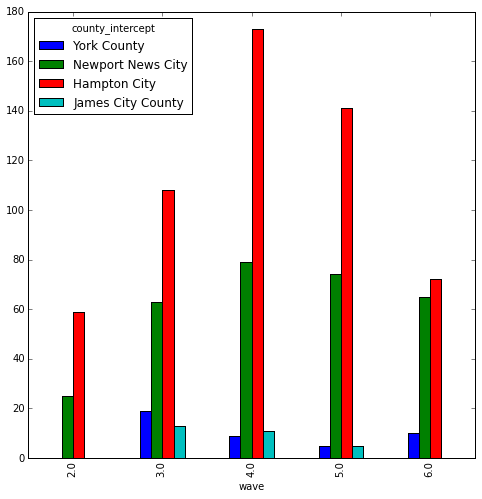

In [48]:
t.unstack(0)[['York County','Newport News City','Hampton City','James City County']].plot(kind='bar',figsize=(8, 8))

We can also stack data we have unstacked:

In [49]:
t_unstacked = t.unstack(0)
t_unstacked.stack()

wave  county_intercept     
2     Accomack County          101
      Chesapeake City           10
      Hampton City              59
      Isle of Wight County      17
      Newport News City         25
      Norfolk City              18
      Northampton County         7
      Virginia Beach City      382
      Westmoreland County        5
3     Accomack County          172
      Chesapeake City            8
      Essex County              19
      Gloucester County         40
      Hampton City             108
      James City County         13
      Mathews County            20
      Middlesex County          64
      Newport News City         63
      Norfolk City             125
      Northampton County        73
      Northumberland County     11
      Poquoson City             23
      Portsmouth City           31
      Richmond County           21
      Suffolk City              11
      Surry County               2
      Virginia Beach City      427
      Westmoreland County  

## Pivot Table

Borrowing from excel, pandas can create pivot tables of summary statistics.  Suppose we want counties as rows and waves as columns, with the average and standard deviation of 2 and 12 month avidity.  

In [50]:
pd.pivot_table(trips_fips.loc['VA'],index='county_intercept',columns='wave',
               values=['ffdays2','ffdays12'],aggfunc=[np.mean, np.std],fill_value="-")

mean                                           \
                        ffdays2                                            
wave                          2          3         4         5         6   
county_intercept                                                           
Accomack County        2.772277   2.290698  3.524862      4.42        10   
Chesapeake City             3.2       5.75         8  4.666667  10.06061   
Essex County                  -   1.578947        12         -  2.733333   
Gloucester County             -       4.05         8  9.742857       6.5   
Hampton City           2.745763   3.611111  4.907514  3.425532  5.458333   
Isle of Wight County          3          -         -  6.111111         -   
James City County             -   3.846154  6.636364       1.4         -   
King William County           -          -         5         -         -   
Mathews County                -        7.1  11.83333       3.5       7.2   
Middlesex County              -   1.984375      5.25  4.460317  4.857143   
Newport News City          8.44   1.714286  3.113924  4.486486  4.553846   
Norfolk City           1.777778      2.408  3.044025  6.673469     4.875   
Northampton County     3.428571   3.273973  4.916667   6.55102  2.533333   
Northumberland County         -  0.1818182     1.375       4.6      73.5   
Poquoson City                 -   7.608696  10.18182  7.833333       2.5   
Portsmouth City               -   3.451613  5.461538         -     10.45   
Richmond County               -          4         2      1.75         -   
Suffolk City                  -   2.727273  3.846154  4.222222         -   
Surry County                  -          0         5        22         -   
Virginia Beach City    2.544503   3.601874  3.764563  4.944282  5.538217   
Westmoreland County           8        2.8      0.25         -         0   
York County                   -   4.789474  7.777778       3.8       6.6   

                                                                          \
                       ffdays12                                            
wave                          2         3         4         5          6   
county_intercept                                                           
Accomack County        21.56436  9.662791  11.11602      16.7         50   
Chesapeake City            13.9    26.625        36  23.33333    45.0303   
Essex County                  -  25.42105  60.66667         -   12.06667   
Gloucester County             -    23.575    44.625  49.48571    39.0625   
Hampton City           38.01695  22.96296  27.28902  21.90071   40.45833   
Isle of Wight County   24.47059         -         -  26.77778          -   
James City County             -  23.46154  31.81818       4.2          -   
King William County           -         -  9.666667         -          -   
Mathews County                -     66.45  82.33333        21   21.33333   
Middlesex County              -  10.60938  24.96667   17.7619   24.96429   
Newport News City         96.88  40.87302  12.51899  16.47297   29.10769   
Norfolk City           25.72222    23.472  14.35849   25.2449     26.075   
Northampton County     37.28571  15.90411  14.39815  28.40816   18.41667   
Northumberland County         -  2.181818     8.125      23.6     749.25   
Poquoson City                 -  53.52174  34.72727        22   11.78571   
Portsmouth City               -  12.96774  16.61538         -      47.15   
Richmond County               -  14.85714         2         6          -   
Suffolk City                  -  7.636364  12.61538         9          -   
Surry County                  -         0         6      87.5          -   
Virginia Beach City    28.08639  29.45667  18.89078  20.07918   31.76752   
Westmoreland County        25.4      20.6      1.25         -  0.3333333   
York County                   -  29.94737  36.22222        11       41.5   

                            std                                          

### Exporting Data from Pandas

You may want to export dataframes and other information to other packages (e.g. latex, excel, or stata).  Pandas has a lot of `to_` methods on pandas dataframes and series.  For example we can export some interesting information to latex table code:  

In [51]:
(t.unstack().head(25)).to_latex('excel_example.tex',na_rep='-')

In [52]:
(t.unstack().head(25)).to_excel('excel_example.xls')

## Econometrics in Python

In [3]:
import statsmodels.formula.api as smf    

# load data and create dataframe
tobias_koop=pd.read_csv('https://rlhick.people.wm.edu/econ407/data/tobias_koop_t_4.csv')

tobias_koop.head()

id  educ  ln_wage  pexp  time  ability  meduc  feduc  broken_home  \
0   4    12     2.14     2     4     0.26     12     10            1   
1   6    15     1.91     4     4     0.44     12     16            0   
2   8    13     2.32     8     4     0.51     12     15            1   
3  11    14     1.64     1     4     1.82     16     17            1   
4  12    13     2.16     6     4    -1.30     13     12            0   

   siblings  pexp2  
0         4      4  
1         2     16  
2         2     64  
3         2      1  
4         5     36

In [4]:
formula = "ln_wage ~ educ + pexp + pexp2 + broken_home"
results = smf.ols(formula,tobias_koop).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     51.36
Date:                Thu, 17 Sep 2015   Prob (F-statistic):           1.83e-39
Time:                        14:52:15   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.4603      0.137      3.353      